## Making Sentiment Analysis Better with NLTK & Scikit-Learn

So you might be asking, what exactly is "sentiment analysis"? 

Well, it's exactly what it sounds like: it's building a computational system to determine the emotional tone behind words. This is important because it allows you to gain an understanding of the attitudes, opinions, and emotions of the people in your data. At a higher level, sentiment analysis involves Natural language processing and artificial intelligence by taking the actual text element, transforming it into a format that a machine can read, and using statistics to determine the actual sentiment.

In this tutorial, we'll review some of the methods used to determine sentiment, but focus on the ways in which we can make sentiment analysis *better*. 


### Environment Setup

This guide was written in Python 3.6. If you haven't already, download Python and Pip. Next, you’ll need to install several packages that we’ll use throughout this tutorial:

``` 
pip3 install re
pip3 install nltk
pip3 install sklearn
```

Lastly, download the data we'll be working with in this example. You can find this in your folder as `negative_tweets` and `positive_tweets`.

Now you're all set to begin!

Sentiment Analysis isn't a new problem. There are thousands of labeled data out there, labels varying from simple positive and negative to more complex systems that determine *how* positive or negative is a given text. With that said, I've selected a pre-labeled set of data consisting of tweets from Twitter. Using this data, we'll begin by building a sentiment analysis model with scikit-learn. 

For those of you unfamiliar with scikit-learn, `scikit-learn` is a Python module with built-in implemented machine learning algorithms. In this tutorial, we'll specifically use the Logistic Regression model, which is a linear model commonly used for classifying binary data.

In [3]:
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split 
# if this doesn't work, try: from sklearn.cross_validation import train_test_split

# 1. Building Sentiment Classifier using Scikit-Learn package

### Preparing the Data

To implement our linear classifier, we need the twitter data in a format that allows us to feed it into the classifier. Using the `sklearn.feature_extraction.text.CountVectorizer`, we will convert the text documents to a matrix of token counts. As you'll see soon enough, these vector counts will be what the classifier will ultimately use to train. So first, we import all the needed modules: 

But before we even get to vectorizing, we haven't even read in our data! Each file is a text file where each line is a sentence, so we can use the built-in `open()` function to split the file into tweets and append them to lists. Note that text and labels have to be separated for the test phase of this example!

In [4]:
text_pos = []
labels_pos = []
with open("/content/pos_tweets.txt") as f:
    for i in f: 
        text_pos.append(i) 
        labels_pos.append('pos')

text_neg = []
labels_neg = []
with open("/content/neg_tweets.txt") as f:
    for i in f: 
        text_neg.append(i)
        labels_neg.append('neg')

Now that the data is properly stored in Python lists, it's time to split this data into training and test data. For the purpose of this tutorial, we'll keep 80% for training and 20% for testing -- we do this with Python list slicing! 

In [5]:
training_text = text_pos[:int((.8)*len(text_pos))] + text_neg[:int((.8)*len(text_neg))]
training_labels = labels_pos[:int((.8)*len(labels_pos))] + labels_neg[:int((.8)*len(labels_neg))]

test_text = text_pos[int((.8)*len(text_pos)):] + text_neg[int((.8)*len(text_neg)):]
test_labels = labels_pos[int((.8)*len(labels_pos)):] + labels_neg[int((.8)*len(labels_neg)):]

Next, we initialize a vectoriser with the CountVectorizer class. Because we haven't pre-processed any of the data, we'll set lowercase to `False` and exclude stop word removal or stemming. 

In [6]:
vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    max_features = 85
)

Next, we use the `fit_transform()` method to transform our corpus data into feature vectors. Since the input needed is a list of strings, we concatenate all of our training and test data. 

In [7]:
features = vectorizer.fit_transform(
    training_text + test_text)

features_nd = features.toarray() # for easy use

As a final step, we'll split the training data to get an evaluation set through scikit-learn's built-in cross validation method. All we need to do is provide the data and assign a training percentage (in this case, 80%).

In [8]:
x_train, x_test, y_train, y_test  = train_test_split(
        features_nd[0:len(training_text)], 
        training_labels,
        train_size=0.80, 
        random_state=1234)

### Building Model - Linear Classifier

Finally, we can build the classifier for this corpus! As mentioned before, we'll be using the Logistic Regression from scikit-learn, so we'll start there: 

In [9]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

Once the model is initialized, we have to fit it to our specific dataset, so we use scikit-learn's `fit()` method to do so:

In [10]:
log_model = log_model.fit(x_train, y_train)

And finally, we use this classifier to label the evaluation set we created earlier:

In [11]:
test_pred = log_model.predict(x_test)

In [ ]:
print(test_pred)

### Tesing Model Accuracy

Now just for our own "fun", let's take a look at some of the classifications our model makes! We'll choose a random set and then call our model on each! 

In [13]:
import random
spl = random.sample(range(len(test_pred)), 10)
for text, sentiment in zip(test_text, test_pred[spl]):
    print (sentiment, text)

neg "Love that the Obamas are bringing back date night. Men, take note  http://bit.ly/ebPBZ"

neg "loves chocolate milk  and that is GF YEAH.."

neg "loving life... and loving you "

pos "Lunch date with @Londonmitch to go to Leathenhall Market's cheese shop was really nice "

neg "Made my evening: Starbucks barista complimented me on my hamsa scarf. When he heard I designed it and sell them on etsy he was "

neg "Matt came to visit!  canton with him for dinner then prolly stopping somewhere for drinks and the cavs "

pos "May be going to London next week "

pos "me and rosa are going 2 start our own youtube channel! i'm super excited that we get 2 share our RaNdOmNeSs with the world!!!! "

neg "Modern warfare 2 gameplay looks goood  #xboxe3"

neg "Momz just made it back from Vegas, yayyyyy! "



Just glancing over the examples above, it's pretty obvious there are some misclassifications. But obviously we want to do more than just 'eyeball' the data, so let's actually calculate the accuracy score. 

What's the point in creating a machine learning algorithm if you have no idea how it performs? This is why we left some of the dataset for testing purposes. In scikit-learn, there is a function called sklearn.metrics.accuracy_score which calculates the accuracy percentage. Using this, we see that this model has an accuracy of about 76%. 

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, test_pred))

0.7601246105919003


Yikes. 76% is better than randomly guessing, but still pretty low as far as classification accuracy goes. *Maybe* this is the best we can do with this dataset, but maybe we *can* do better? So let's give it a try with the Python module `nltk`. 

# 2. Building Sentiment Classifier using NLTK package

### Preparing the Data 

`nltk` is a much different from `scikit-learn`. `nltk` specializes and is *made for* natural language processing tasks, so needless to say, it was expected that `scikit-learn` wouldn't necessarily be the best choice. 
 
With that said, we'll now use `nltk` to build a sentiment analysis model on the same dataset. `nltk` requires a different data format, which is why I've implemented the function below:

In [15]:
import nltk
nltk.download('punkt')

def format_sentence(sent):
    return({word: True for word in nltk.word_tokenize(sent)})



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
print(format_sentence("The cat is very cute"))

{'The': True, 'cat': True, 'is': True, 'very': True, 'cute': True}


Here, `format_sentence` changes each tweet into a dictionary of words mapped to `True` booleans. Though not obvious from this function alone, this will eventually allow us to train our prediction model by splitting the text into its tokens, i.e. <i>tokenizing</i> the text. You'll learn about why this format is important in a later section.

Using the data on the github repo, we'll actually format the positively and negatively labeled data.

In [17]:
import io
pos = []
with io.open("/content/pos_tweets.txt", 'rU', encoding='utf-8') as f:
    for i in f: 
        pos.append([format_sentence(i), 'pos'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
neg = []
with io.open("/content/neg_tweets.txt", 'rU', encoding='utf-8') as f:
    for i in f: 
        neg.append([format_sentence(i), 'neg'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


Next, we'll split the labeled data into the training and test data, just as we did before.

In [19]:
training = pos[:int((.8)*len(pos))] + neg[:int((.8)*len(neg))]
test = pos[int((.8)*len(pos)):] + neg[int((.8)*len(neg)):]

### Building a Classifier

All NLTK classifiers work with feature structures, which can be simple dictionaries mapping a feature name to a feature value. In this example, we use the Naive Bayes Classifier, which makes predictions based on the word frequencies associated with each label of positive or negative.

In [20]:
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(training)

Since the Naive Bayes Classifier is based entirely off of the frequencies associated with each label for a given word, we can call a function `show_most_informative_features()` to see which words are the highest indicators of a positive or negative label:

In [21]:
classifier.show_most_informative_features()

Most Informative Features
                      no = True              neg : pos    =     19.4 : 1.0
                    love = True              pos : neg    =     19.0 : 1.0
                 awesome = True              pos : neg    =     17.2 : 1.0
                headache = True              neg : pos    =     16.2 : 1.0
                      Hi = True              pos : neg    =     12.7 : 1.0
                     New = True              pos : neg    =      9.7 : 1.0
                   Thank = True              pos : neg    =      9.7 : 1.0
                     fan = True              pos : neg    =      9.7 : 1.0
               beautiful = True              pos : neg    =      9.7 : 1.0
                    haha = True              pos : neg    =      9.3 : 1.0


Notice that there are three columns. Column 1 is why we used `format_sentence()` to map each word to a `True` value. What it does is count the number of occurences of each word for both labels to compute the ratio between the two, which is what column 3 represents. Column 2 lets us know which label occurs more frequently (the label on the left is the label most associated with the corresponding word. 

### Classification

Just to see how our model works, let's try the classifier out with a positive example: 

In [22]:
example1 = "Twilio is an awesome company!"

print(classifier.classify(format_sentence(example1)))

pos


Now let's try out an example we'd expect a negative label: 

In [23]:
example2 = "I'm sad that Twilio doesn't have even more blog posts!"

print(classifier.classify(format_sentence(example2)))

neg


So what happens when we mix words of different sentiment labels? Let's take a look at this example:

In [24]:
example3 = "I have no headache!"

print(classifier.classify(format_sentence(example3)))

neg


And we've found a mislabel! Naive Bayes doesn't consider the relationship *between* words, which is why it wasn't able to catch the fact that "no" acted as a negator to the word `headache`. Instead, it read two negative indicators and classified it as such. 

Given that, we can probably expect a less than perfect accuracy rate.

### Accuracy

Just like `scikit-learn`, nltk has a built in method that computes the accuracy rate of our model:

In [25]:
from nltk.classify.util import accuracy
print(accuracy(classifier, test))

0.8308457711442786


And we have improved performance! Awesome. Now, 83% is fairly solid, but it could be better! If you look at the actual data, you'll see that the data is kind of messy - there are typos, abbreviations, grammatical errors of all sorts. So how do we handle that? Can we handle that? Stay tuned for more soon. 

# 3. Validating Classifier Output using Count and Visualization

In [29]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### In this case we are validating text_pos (positive data) from the above examples

In [30]:
file1 = []
with open("/content/textsample1.txt") as f:
    for i in f:
        file1.append(i) 

w1 = nltk.word_tokenize(str(file1))

In [31]:
file2 = []
with open("/content/textsample2.txt") as f:
    for i in f:
        file2.append(i) 

w2 = nltk.word_tokenize(str(file2))

### Preprocessing data to remove stop words

In [40]:
default_stopwords = stopwords.words('english')
default_stopwords.extend(['...','\'re','n\'t','\'the','\'this','\'it','n\'',
                         'it\\','\'1\\ti','\'0\\ti','\'0\\tda','.\\n','..\\n',
                         '1\\ti','\'1\\tthe','\n'])

In [41]:
#Remove single-character tokens (mostly punctuation)
w1 = [word for word in w1 if len(word) > 2]
w2 = [word for word in w2 if len(word) > 2]

#Remove numbers
w1 = [word for word in w1 if not word.isnumeric()]
w2 = [word for word in w2 if not word.isnumeric()]

# Lowercase all words (default_stopwords are lowercase too)
w1 = [word.lower() for word in w1]
w2 = [word.lower() for word in w2]

# Remove stopwords
w1 = [word for word in w1 if word not in default_stopwords]
w2 = [word for word in w2 if word not in default_stopwords]

### Display Frequency count for dataset

In [43]:
# Calculate frequency distribution for textfile_1
f1 = nltk.FreqDist(w1)

# Output top 10 words

for word, frequency in f1.most_common(10):
    print(u'{};{}'.format(word, frequency))

love;1446
vinci;1000
harry;986
like;950
awesome;894
code;888
impossible;828
mountain;793
mission;776
brokeback;711


In [44]:
# Calculate frequency distribution for textfile_2
f2 = nltk.FreqDist(w2)

# Output top 10 words

for word, frequency in f2.most_common(10):
    print(u'{};{}'.format(word, frequency))

vinci;1003
code;975
mountain;906
harry;894
potter;795
brokeback;776
hate;571
sucked;484
sucks;405
movie;373


### Visualizing the Frequency Count

In [ ]:
import pip
pip.main(['install', '--user', 'wordcloud'])

If there's an error in the above code, it might be because the pip package is out of date. In that case, install "wordcloud" package using pip command on your commandline:
```pip3 install wordcloud```

In [ ]:
from wordcloud import WordCloud
cloud_1 = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frequencies=f1)

(-0.5, 799.5, 399.5, -0.5)

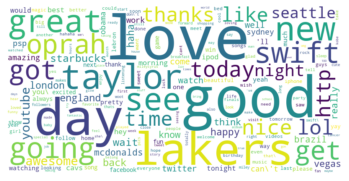

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Complete Your Assignment Questions Here

# QUESTION-1

In [27]:
##Naive Bayes Classification on Text_1
positive=0
negative=0
with io.open("/content/textsample1.txt", 'r+', encoding='utf-8') as file_1:
    for i in file_1: 
        pred=classifier.classify(format_sentence(i))
        if pred=='pos':
            positive=positive+1
        elif pred=='neg':
            negative=negative+1
if negative>positive:
    print('negative_class')
else:
    print('positive_class')

positive_class


In [28]:
##Naive Bayes Classification on Text_2
positive=0
negative=0
with io.open("/content/textsample2.txt", 'r+', encoding='utf-8') as file_1:
    for i in file_1: 
        pred=classifier.classify(format_sentence(i))
        if pred=='pos':
            positive=positive+1
        elif pred=='neg':
            negative=negative+1
if negative>positive:
    print('negative_class')
else:
    print('positive_class')

negative_class


# Question-2(Frequency Count and Word Cloud)

In [45]:
# Calculate frequency distribution for textfile_1
f1 = nltk.FreqDist(w1)

# Output top 10 words

for word, frequency in f1.most_common(10):
    print(u'{};{}'.format(word, frequency))

love;1446
vinci;1000
harry;986
like;950
awesome;894
code;888
impossible;828
mountain;793
mission;776
brokeback;711


In [46]:
# Calculate frequency distribution for textfile_2
f2 = nltk.FreqDist(w2)

# Output top 10 words

for word, frequency in f2.most_common(10):
    print(u'{};{}'.format(word, frequency))

vinci;1003
code;975
mountain;906
harry;894
potter;795
brokeback;776
hate;571
sucked;484
sucks;405
movie;373


In [47]:
from wordcloud import WordCloud
cloud_1 = WordCloud(width=800, height=400, background_color='white')
cloud_1.generate_from_frequencies(frequencies=f1)

In [48]:
from wordcloud import WordCloud
cloud_2 = WordCloud(width=800, height=400, background_color='white')
cloud_2.generate_from_frequencies(frequencies=f2)

(-0.5, 799.5, 399.5, -0.5)

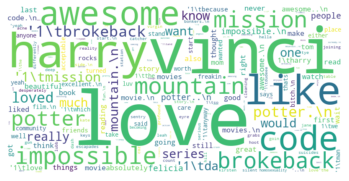

In [49]:
import matplotlib.pyplot as plt
plt.imshow(cloud_1, interpolation='bilinear')
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

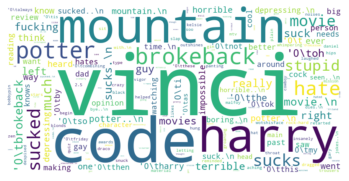

In [50]:
import matplotlib.pyplot as plt
plt.imshow(cloud_2, interpolation='bilinear')
plt.axis("off")

### Question 3)Analysis from Results of 1 and 2

From 1 we can infer that the first text is classified as positive text in which it contains the positive words(love,awesome,like) and from 2 it is clear that count is more for positive words and from the world cloud as the count is  more for positive words it appears to be larger in size based on the count.From 1 and 2 we can infer that the **text_1 can be classified as positive**

From 1 we can infer that the second text is classified as negative text in which it contains the negative words(hate,stupid,sucked) and from 2 it is clear that count is more for negative words and from the world cloud as the count is more for negative words it appears to be larger in size based on the count.From 1 and 2 we can infer that the **text_2 is classified as negative**

## Question4)Sentiment for text_1

In [56]:
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split 

In [57]:
import pandas as pd

In [58]:
df1=pd.read_csv("/content/textsample1.txt",sep='\t',header=None)

In [59]:
df1.head()

,0,1
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [60]:
df1 = df1.rename(columns={0: 'Class',1:'Review'})

In [61]:
import re
import string
def round1_clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
clean1=lambda x:round1_clean(x)

In [62]:
df1['clean'] = pd.DataFrame(df1.Review.apply(clean1))

In [65]:
def clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

clean2 = lambda x: clean_2(x)

In [66]:
df1['clean'] = pd.DataFrame(df1.clean.apply(clean_2))


In [68]:
from nltk.tokenize import RegexpTokenizer   ##Tokenization
regexp = RegexpTokenizer('\w+')
df1['token']=df1['clean'].apply(regexp.tokenize)
df1.head(5)

,Class,Review,clean,token
0,1,The Da Vinci Code book is just awesome.,the da vinci code book is just awesome,"[the, da, vinci, code, book, is, just, awesome]"
1,1,this was the first clive cussler i've ever rea...,this was the first clive cussler ive ever read...,"[this, was, the, first, clive, cussler, ive, e..."
2,1,i liked the Da Vinci Code a lot.,i liked the da vinci code a lot,"[i, liked, the, da, vinci, code, a, lot]"
3,1,i liked the Da Vinci Code a lot.,i liked the da vinci code a lot,"[i, liked, the, da, vinci, code, a, lot]"
4,1,I liked the Da Vinci Code but it ultimatly did...,i liked the da vinci code but it ultimatly did...,"[i, liked, the, da, vinci, code, but, it, ulti..."


In [69]:
##removing stop words and joining the words
import nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words("english")  ##Removal of stop words
df1['token'] = df1['token'].apply(lambda x: [item for item in x if item not in stopwords])
df1['token'] = df1['token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer ##Lemmatization
wordnet_lem = WordNetLemmatizer()
df1['token'] = df1['token'].apply(wordnet_lem.lemmatize)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [71]:
df1.head()

,Class,Review,clean,token
0,1,The Da Vinci Code book is just awesome.,the da vinci code book is just awesome,vinci code book awesome
1,1,this was the first clive cussler i've ever rea...,this was the first clive cussler ive ever read...,first clive cussler ive ever read even books l...
2,1,i liked the Da Vinci Code a lot.,i liked the da vinci code a lot,liked vinci code lot
3,1,i liked the Da Vinci Code a lot.,i liked the da vinci code a lot,liked vinci code lot
4,1,I liked the Da Vinci Code but it ultimatly did...,i liked the da vinci code but it ultimatly did...,liked vinci code ultimatly didnt seem hold


In [83]:
df1=df1.drop(['clean'], axis = 1)
df1 = df1.rename(columns={'token':'Clean_data'})

In [84]:
df1 = df1.rename(columns={'token':'Clean_data'})

In [85]:
from textblob import TextBlob
pola = lambda x: TextBlob(x).sentiment.polarity

In [86]:
df1['polarity'] = df1['Clean_data'].apply(pola)

In [87]:
sen=[]
for i in df1["polarity"]:
  if i==0:
    sen.append("neutral")
  elif i>0:
    sen.append("positive")
  else:
    sen.append("negative")

In [88]:
senti = pd.DataFrame(sen, columns =['Sentiment'])
df1_sentiment=pd.concat([df1,senti], axis=1)

In [95]:
df1_sentiment.head(10)

,Class,Review,Clean_data,polarity,Sentiment
0,1,The Da Vinci Code book is just awesome.,vinci code book awesome,1.000,positive
1,1,this was the first clive cussler i've ever rea...,first clive cussler ive ever read even books l...,0.375,positive
2,1,i liked the Da Vinci Code a lot.,liked vinci code lot,0.600,positive
3,1,i liked the Da Vinci Code a lot.,liked vinci code lot,0.600,positive
4,1,I liked the Da Vinci Code but it ultimatly did...,liked vinci code ultimatly didnt seem hold,0.600,positive
5,1,that's not even an exaggeration ) and at midni...,thats even exaggeration midnight went walmart ...,0.600,positive
6,1,"I loved the Da Vinci Code, but now I want some...",loved vinci code want something better different,0.400,positive
7,1,"i thought da vinci code was great, same with k...",thought vinci code great kite runner,0.800,positive
8,1,The Da Vinci Code is actually a good movie...,vinci code actually good movie,0.700,positive
9,1,I thought the Da Vinci Code was a pretty good ...,thought vinci code pretty good book,0.475,positive


In [92]:
k=df1_sentiment.drop(["Clean_data",'polarity'],axis=1)

In [96]:
k.head(10)

,Class,Review,Sentiment
0,1,The Da Vinci Code book is just awesome.,positive
1,1,this was the first clive cussler i've ever rea...,positive
2,1,i liked the Da Vinci Code a lot.,positive
3,1,i liked the Da Vinci Code a lot.,positive
4,1,I liked the Da Vinci Code but it ultimatly did...,positive
5,1,that's not even an exaggeration ) and at midni...,positive
6,1,"I loved the Da Vinci Code, but now I want some...",positive
7,1,"i thought da vinci code was great, same with k...",positive
8,1,The Da Vinci Code is actually a good movie...,positive
9,1,I thought the Da Vinci Code was a pretty good ...,positive


In [97]:
##SAVING TO DATAFRAME
k.to_csv(r'/content/sample_data/text1_sentiment.txt',index=None, sep='\t', mode='a')

# QUESTION 5

In [98]:
import io
text1 = []
with io.open("/content/textsample1.txt", 'rU', encoding='utf-8') as f:
    for i in f: 
        text1.append([format_sentence(i), 'pos'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [101]:
train = text1[:int((.8)*len(text1))]
testing = text1[int((.8)*len(text1)):]

In [105]:
from nltk.classify.util import accuracy
print(round(accuracy(classifier,testing),3))

0.896


# Accuracy score is 89% which means out of 100 observations 89 are classified correctly